In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Dataset/Bank_churn.csv')
print(df.shape)
df.head()

(10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df1 = df.drop('RowNumber', axis=1)
df1.drop('CustomerId', axis=1, inplace=True)
df1.drop('Surname', axis=1, inplace=True)
df1.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [4]:
df2 = df1.copy()
columns_ = ['Geography', 'Gender']
le_dict = {col: LabelEncoder() for col in columns_ }
for col in columns_:
    df2[col] = le_dict[col].fit_transform(df1[col])
df2.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

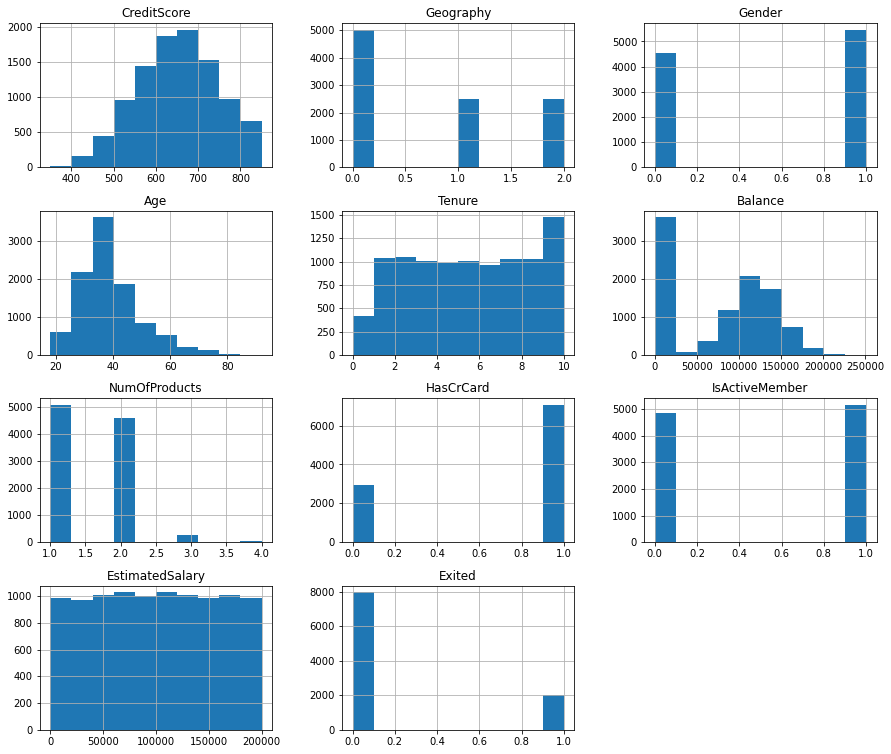

In [5]:
df2.hist(figsize=(15,13))
plt.show()

In [6]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [7]:
cols_to_scale = ['CreditScore','Age', 'EstimatedSalary', 'Balance']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
# print(df2.columns)
df2.head()

CreditScore  Geography  Gender       Age  Tenure   Balance  NumOfProducts  \
0        0.538          0       0  0.324324       2  0.000000              1   
1        0.516          2       0  0.310811       1  0.334031              1   
2        0.304          0       0  0.324324       8  0.636357              3   
3        0.698          0       0  0.283784       1  0.000000              2   
4        1.000          2       0  0.337838       2  0.500246              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         0.506735       1  
1          0               1         0.562709       0  
2          1               0         0.569654       1  
3          0               0         0.469120       0  
4          1               1         0.395400       0

In [ ]:
model = keras.Sequential()

#Input Layer
model.add(keras.layers.Dense(X.shape[1], activation='relu', input_shape = (10,)))

#Hidden Layer
# model.add(keras.layers.Dense(26, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#Output Layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Tensorboard
log_dir = "logs/fit/bank_churn" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.summary()

In [ ]:
# model.fit(X_train, y_train, epochs=100, callbacks=[tensorboard_callback])
model.fit(X_train, y_train, epochs=100)

In [ ]:
model.evaluate(X_test, y_test)

In [1]:
y_predr = np.rint(model.predict(X_test))

NameError: name 'np' is not defined

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
print(classification_report(y_test, y_predr))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.36      0.03      0.06       405

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.47      2000
weighted avg       0.71      0.79      0.72      2000



In [121]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predr)
print(cm)

tf.Tensor(
[[1572   23]
 [ 392   13]], shape=(2, 2), dtype=int32)


In [8]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [9]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

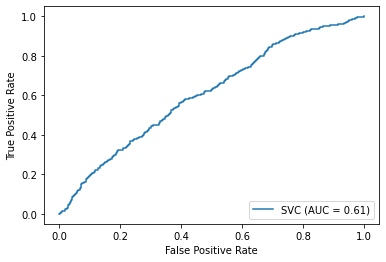

In [10]:
prd = classifier.predict(X_test)
plot_roc_curve(classifier, X_test, y_test)

In [11]:
classifier.score(X_test, y_test)

0.7815

In [12]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = logisticRegr.predict(X_test)

In [14]:
logisticRegr.score(X_test, y_test)

0.791